Okay now that we know basics of BAG of n grams vectorizer 😎 It is the time to work on a real problem. Here we want to do a news category classification. We will use bag of n-grams and traing a machine learning model that can categorize any news into one of the following categories,

BUSINESS

SPORTS

CRIME

SCIENCE

In [2]:
import pandas as pd
df = pd.read_json("news_dataset.json")
df.shape

(12695, 2)

In [4]:
df.head()

,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [5]:
df.category.value_counts()

category
BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: count, dtype: int64

Data is imbalanced, so we will do undersampling

In [6]:
min_samples = 1381

df_business = df [df.category == "BUSINESS"].sample(min_samples, random_state=123)
df_sports = df [df.category == "SPORTS"].sample(min_samples, random_state=123)
df_crime = df [df.category == "CRIME"].sample(min_samples, random_state=123)
df_science= df [df.category == "SCIENCE"].sample(min_samples, random_state=123)

In [7]:
df_balanced = pd.concat([df_business, df_science, df_sports, df_crime], axis=0)
df_balanced.category.value_counts()

category
BUSINESS    1381
SCIENCE     1381
SPORTS      1381
CRIME       1381
Name: count, dtype: int64

In [8]:
df_balanced.head()

,text,category
9830,United Airlines General Counsel To Take Over A...,BUSINESS
7924,Why Elon Musk’s Plan To Merge Tesla With Solar...,BUSINESS
51,Who's Winning: You Or The City? Take This Quiz...,BUSINESS
11008,Why Your Fancy Banking App Isn't Helping You B...,BUSINESS
12688,Basic Premise of Social Integration Easy for u...,BUSINESS


In [10]:
df_balanced["num_category"] = df.category.map({
    'BUSINESS': 0,
    'SPORTS': 1, 
    'CRIME': 2, 
    'SCIENCE': 3
    })

In [12]:
df_balanced.head()

,text,category,num_category
9830,United Airlines General Counsel To Take Over A...,BUSINESS,0
7924,Why Elon Musk’s Plan To Merge Tesla With Solar...,BUSINESS,0
51,Who's Winning: You Or The City? Take This Quiz...,BUSINESS,0
11008,Why Your Fancy Banking App Isn't Helping You B...,BUSINESS,0
12688,Basic Premise of Social Integration Easy for u...,BUSINESS,0


BUILD MODEL WITHOUT PREPROCESSING DATA

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.text,
    df_balanced.num_category,
    test_size=.2,
    random_state=20,
    stratify=df_balanced.num_category
)

In [15]:
print(X_train.shape)
X_train.head()

(4419,)


1360     Stan Wawrinka Beats Novak Djokovic To Win U.S....
5481     North Korea Sanctions Must Target Regime To Br...
808      Swimming With the 'Sharks': Barbara Corcoran S...
12652    Report: Former Microsoft CEO Agrees To Buy Cli...
6707     He's Grounded! Delta Bans Obnoxious Trump Supp...
Name: text, dtype: object

In [17]:
y_train.value_counts()
y_test.value_counts()

num_category
3    277
1    276
0    276
2    276
Name: count, dtype: int64

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

Bag of words with ngram_range=(1,1)

In [21]:
clf = Pipeline([
    ("vectorizer", CountVectorizer()),
    ("nb", MultinomialNB())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       276
           1       0.91      0.84      0.88       276
           2       0.90      0.91      0.90       276
           3       0.89      0.77      0.82       277

    accuracy                           0.86      1105
   macro avg       0.87      0.86      0.86      1105
weighted avg       0.87      0.86      0.86      1105



Bag of words with ngram_range=(1,2)

In [23]:
clf = Pipeline([
    ("v", CountVectorizer(ngram_range=(1,2))),
    ("nb", MultinomialNB())
])

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80       276
           1       0.93      0.82      0.87       276
           2       0.88      0.89      0.89       276
           3       0.90      0.70      0.79       277

    accuracy                           0.84      1105
   macro avg       0.85      0.84      0.84      1105
weighted avg       0.85      0.84      0.84      1105



Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [25]:
import spacy
nlp = spacy.load("en_core_web_sm")
def preprocess(text):
    doc = nlp(text)
    no_stops = [token.lemma_ for token in doc if not token.is_punct and not token.is_stop]
    return " ".join(no_stops)

In [26]:
df_balanced['preprocessed_txt'] = df_balanced.text.apply(preprocess)
df_balanced.head()

,text,category,num_category,preprocessed_txt
9830,United Airlines General Counsel To Take Over A...,BUSINESS,0,United Airlines General Counsel acting ceo Oct...
7924,Why Elon Musk’s Plan To Merge Tesla With Solar...,BUSINESS,0,Elon Musk plan merge Tesla SolarCity probably ...
51,Who's Winning: You Or The City? Take This Quiz...,BUSINESS,0,win City Quiz find
11008,Why Your Fancy Banking App Isn't Helping You B...,BUSINESS,0,Fancy Banking App help Budget Better wait app ...
12688,Basic Premise of Social Integration Easy for u...,BUSINESS,0,Basic Premise Social Integration Easy advisors...


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.preprocessed_txt, 
    df_balanced.num_category, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df_balanced.num_category
)

In [30]:
print(X_train.shape)
X_train.head()

(4419,)


7413    NASA 9/11 Memorial Mars simply World locate 14...
7874    Feds Scrap Grand Vision expand Marine Sanctuar...
6183    Middle School ugly Kardashian trick play work ...
2390    San Bernardino Shooting Report Details Heroism...
8770    Casino Bus Slams NYC build NEW YORK AP casino ...
Name: preprocessed_txt, dtype: object

In [31]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
    ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       276
           1       0.94      0.87      0.90       277
           2       0.85      0.93      0.89       276
           3       0.95      0.82      0.88       276

    accuracy                           0.89      1105
   macro avg       0.89      0.89      0.89      1105
weighted avg       0.89      0.89      0.89      1105



Plot confusion matrix

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[255,   4,  12,   5],
       [  9, 241,  21,   6],
       [ 13,   5, 256,   2],
       [ 31,   7,  12, 226]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

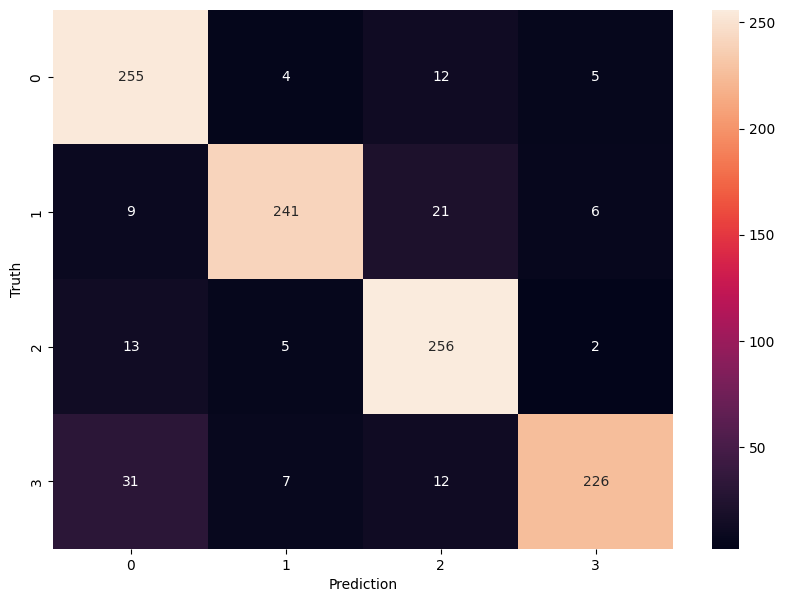

In [34]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')